In [ ]:
# ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# ファイルの読み込み
data = pd.read_csv('../Data/call_center_analysis.csv')

In [ ]:
# データの基本統計量の確認
describe_data = data.describe()
print(describe_data)

         CallID  ExperienceYears  CustomerAge  WaitTimeMin  CallDurationMin  \
count  50.00000         50.00000     50.00000    50.000000        50.000000   
mean   25.50000          3.81000     43.26000     2.802000         9.210000   
std    14.57738          2.66284     15.39389     1.076747         2.883751   
min     1.00000          0.50000     18.00000     0.800000         3.900000   
25%    13.25000          1.50000     31.00000     2.025000         7.225000   
50%    25.50000          3.00000     42.50000     2.800000         8.800000   
75%    37.75000          5.00000     57.75000     3.575000        11.675000   
max    50.00000          8.00000     70.00000     5.800000        15.500000   

       Satisfaction  
count     50.000000  
mean       3.680000  
std        0.712569  
min        2.000000  
25%        3.000000  
50%        4.000000  
75%        4.000000  
max        5.000000  


In [ ]:
# オペレーター別の待ち時間ごとの満足度を求める
data['WaitTimeMin'] = round(data['WaitTimeMin'])
grouped_operator = data.groupby(['WaitTimeMin', 'Operator'])['Satisfaction'].mean()
unstacked_operator = grouped_operator.unstack(fill_value=0)

<Axes: xlabel='WaitTimeMin'>

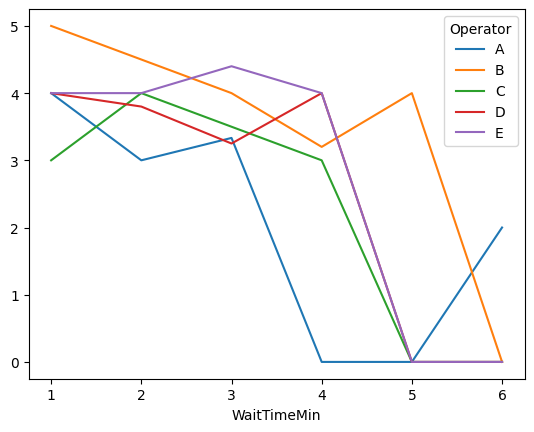

In [ ]:
# 折れ線グラフに可視化
unstacked_operator.plot(kind='line')

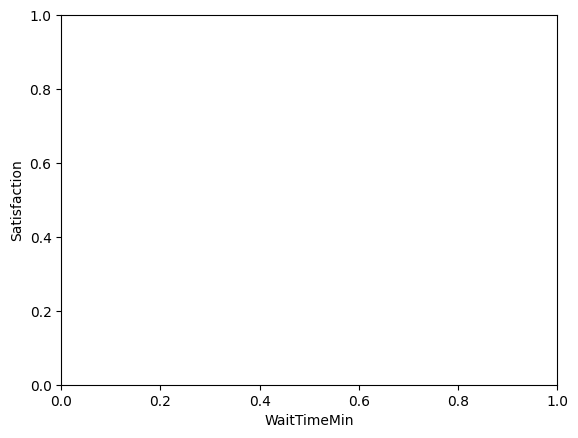

In [ ]:
plt.xlabel('WaitTimeMin')
plt.ylabel('Satisfaction')
plt.tight_layout()
plt.show()

In [ ]:
# 問題タイプごとの解決率をクロス集計表にする
crosstab = pd.crosstab(data['IssueType'], data['Resolved'], normalize='index') * 100
print(crosstab)

Resolved          No        Yes
IssueType                      
Account    45.454545  54.545455
Billing    28.571429  71.428571
Inquiry    18.181818  81.818182
Technical  21.428571  78.571429


In [ ]:
# 通話時間と満足度の関係性を求める
data['CallDurationMin'] = round(data['CallDurationMin'])
grouped_callduration = data.groupby('CallDurationMin', as_index=False)['Satisfaction'].mean()

<Axes: xlabel='CallDurationMin'>

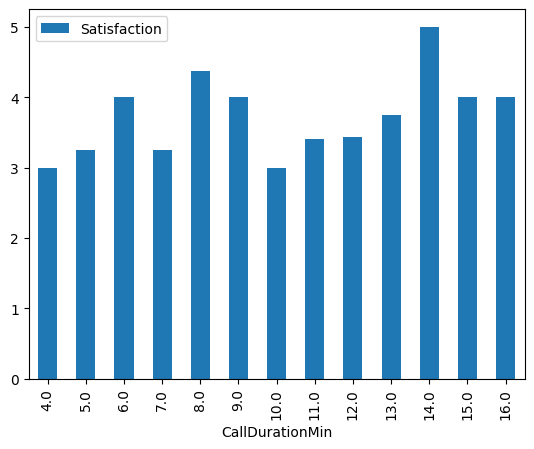

In [ ]:
# 可視化
grouped_callduration.plot(kind='bar', x='CallDurationMin', y='Satisfaction')

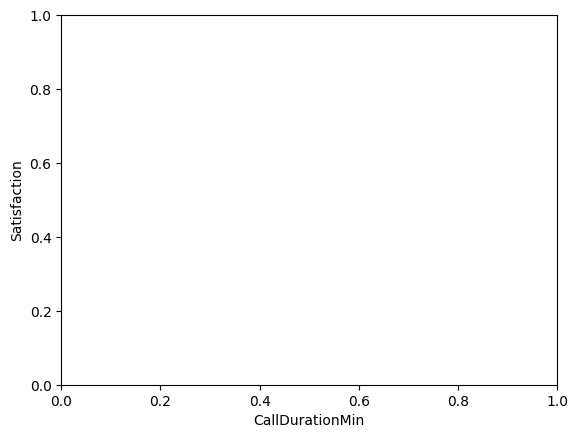

In [ ]:
plt.xlabel('CallDurationMin')
plt.ylabel('Satisfaction')
plt.tight_layout()
plt.show()

# 今日の学び

## 学んだ内容
- 平均値や中央値、標準偏差、ヒストグラム、箱ひげ図の書き方
- 散布図、相関係数、クロス集計表を使ってデータ同士の関係を明らかにする方法

## 所感
- 今までいくつもの関数を学んできたが、それぞれ書き方がちがうため頭の中で整理できておらず、書き方の間違いで沢山エラーがでて正直やめたくなった
- 慣れてないうちは仕方ないと思うので調べながら地道に覚えていくしかないと思った